In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import plotly.express as px

from ast import literal_eval
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import MinMaxScaler


pd.set_option('display.max_columns', 100)
sns.set_palette("light:#5A9")

In [2]:
# Getting song info with Artist name, Album name
song_info = pd.read_csv('../input/19000-spotify-songs/song_info.csv')

In [3]:
song_info.head()

,song_name,artist_name,album_names,playlist
0,Boulevard of Broken Dreams,Green Day,Greatest Hits: God's Favorite Band,00s Rock Anthems
1,In The End,Linkin Park,Hybrid Theory,00s Rock Anthems
2,Seven Nation Army,The White Stripes,Elephant,00s Rock Anthems
3,By The Way,Red Hot Chili Peppers,By The Way (Deluxe Version),00s Rock Anthems
4,How You Remind Me,Nickelback,Silver Side Up,00s Rock Anthems


In [4]:
# Getting song data
song_data = pd.read_csv('../input/19000-spotify-songs/song_data.csv')

In [5]:
song_data.head()

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,Boulevard of Broken Dreams,73,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474
1,In The End,66,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370
2,Seven Nation Army,76,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324
3,By The Way,74,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198
4,How You Remind Me,56,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574


In [6]:
# Showing the fact that there are duplicates
song_data[song_data["song_name"]=="Boulevard of Broken Dreams"]

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,Boulevard of Broken Dreams,73,262333,0.00552,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474
10689,Boulevard of Broken Dreams,71,261266,0.00394,0.490,0.679,0.000015,8,0.0383,-3.680,1,0.0309,167.046,4,0.506


In [7]:
# Droping duplicates in data and info
song_data.drop_duplicates(subset="song_name", keep="first", inplace=True)
song_info.drop_duplicates(subset="song_name", keep="first", inplace=True)

In [8]:
# Joining song info and song data
data = song_data.merge(song_info, on='song_name', how='left')

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13070 entries, 0 to 13069
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song_name         13070 non-null  object 
 1   song_popularity   13070 non-null  int64  
 2   song_duration_ms  13070 non-null  int64  
 3   acousticness      13070 non-null  float64
 4   danceability      13070 non-null  float64
 5   energy            13070 non-null  float64
 6   instrumentalness  13070 non-null  float64
 7   key               13070 non-null  int64  
 8   liveness          13070 non-null  float64
 9   loudness          13070 non-null  float64
 10  audio_mode        13070 non-null  int64  
 11  speechiness       13070 non-null  float64
 12  tempo             13070 non-null  float64
 13  time_signature    13070 non-null  int64  
 14  audio_valence     13070 non-null  float64
 15  artist_name       13070 non-null  object 
 16  album_names       13070 non-null  object

In [10]:
data.describe()

,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
count,13070.000000,1.307000e+04,13070.000000,13070.000000,13070.000000,13070.000000,13070.000000,13070.000000,13070.000000,13070.000000,13070.000000,13070.000000,13070.000000,13070.000000
mean,48.487682,2.186274e+05,0.277770,0.625010,0.635722,0.096672,5.319510,0.180517,-7.790448,0.632976,0.100839,121.151915,3.951568,0.528564
std,20.108158,6.345056e+04,0.301784,0.159125,0.223985,0.246570,3.583933,0.145377,4.110762,0.482011,0.105197,29.105418,0.319291,0.248652
min,0.000000,1.200000e+04,0.000001,0.000000,0.001070,0.000000,0.000000,0.011900,-38.768000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37.000000,1.829672e+05,0.025000,0.524250,0.490000,0.000000,2.000000,0.093300,-9.537250,0.000000,0.037300,98.069500,4.000000,0.334000
50%,51.000000,2.114860e+05,0.147000,0.637000,0.667000,0.000022,5.000000,0.121000,-6.859500,1.000000,0.054400,120.025000,4.000000,0.529000
75%,63.000000,2.445060e+05,0.479750,0.741000,0.815000,0.005910,8.000000,0.223000,-5.041250,1.000000,0.115000,139.955750,4.000000,0.730000
max,100.000000,1.799346e+06,0.996000,0.987000,0.999000,0.997000,11.000000,0.986000,1.585000,1.000000,0.941000,242.318000,5.000000,0.984000


In [11]:
# Getting the stats by artist_name
data_gb_artist = data.groupby(['artist_name']).size().reset_index().sort_values([0], ascending=False)
data_gb_artist.columns = ['artist_name', 'count']

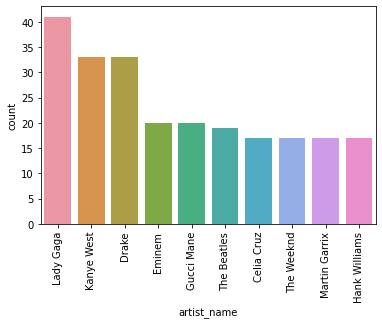

In [12]:
# Printing the most active artists
sns.barplot(x="artist_name", y="count", data=data_gb_artist.head(10))
p = plt.xticks(rotation=90)

In [13]:
# Top popular songs
data.sort_values(['song_popularity'], ascending=False).head(10)

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence,artist_name,album_names,playlist
3618,Happier,100,214289,0.19100,0.687,0.792,0.000000,5,0.1670,-2.749,1,0.0452,100.015,4,0.671,Marshmello,Happier,Certified Gold
1096,I Love It (& Lil Pump),99,127946,0.01140,0.901,0.522,0.000000,2,0.2590,-8.304,1,0.3300,104.053,4,0.329,Kanye West,I Love It,A1 Hip-Hop
3632,Promises (with Sam Smith),98,213309,0.01190,0.781,0.768,0.000005,11,0.3250,-5.991,1,0.0394,123.070,4,0.486,Calvin Harris,Promises (with Sam Smith),Certified Gold
3619,Eastside (with Halsey & Khalid),98,173799,0.55500,0.560,0.680,0.000000,6,0.1160,-7.648,0,0.3210,89.391,4,0.319,benny blanco,Eastside (with Halsey & Khalid),Certified Gold
61,"Taki Taki (with Selena Gomez, Ozuna & Cardi B)",98,212500,0.15300,0.841,0.798,0.000003,1,0.0618,-4.206,0,0.2290,95.948,4,0.591,DJ Snake,"Taki Taki (with Selena Gomez, Ozuna & Cardi B)",100% LatinX
1116,SICKO MODE,97,312820,0.00513,0.834,0.730,0.000000,8,0.1240,-3.714,1,0.2220,155.008,4,0.446,Travis Scott,ASTROWORLD,A1 Hip-Hop
6287,In My Mind,97,184560,0.17600,0.694,0.770,0.000011,6,0.1180,-5.335,1,0.1490,125.905,4,0.163,Dynoro,In My Mind,Global Top 50
1097,Falling Down,97,196400,0.01750,0.669,0.574,0.002940,4,0.1460,-6.442,0,0.0286,120.013,4,0.273,Lil Peep,Falling Down,A1 Hip-Hop
1124,FEFE (feat. Nicki Minaj & Murda Beatz),96,179404,0.08800,0.931,0.387,0.000000,1,0.1360,-9.127,1,0.4120,125.978,4,0.376,6ix9ine,FEFE (feat. Nicki Minaj & Murda Beatz),A1 Hip-Hop
2899,SAD!,96,166605,0.25800,0.740,0.613,0.003720,8,0.1230,-4.880,1,0.1450,75.023,4,0.473,XXXTENTACION,?,Beats & Rhymes


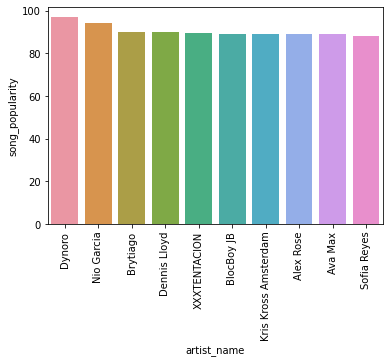

In [14]:
# Getting and printing average popularity by artists
data_gb_artist_avg_pop = data.groupby(['artist_name'])['song_popularity'].mean().to_frame().sort_values(['song_popularity'], ascending=False).reset_index()
sns.barplot(x="artist_name", y="song_popularity", data=data_gb_artist_avg_pop.head(10))
p = plt.xticks(rotation=90)

In [15]:
# Next : aving a 2D graph with
# width = popularity
# x = number of songs
# y = number of albums

# Clustering the songs

In [16]:
data.head()

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence,artist_name,album_names,playlist
0,Boulevard of Broken Dreams,73,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474,Green Day,Greatest Hits: God's Favorite Band,00s Rock Anthems
1,In The End,66,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370,Linkin Park,Hybrid Theory,00s Rock Anthems
2,Seven Nation Army,76,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324,The White Stripes,Elephant,00s Rock Anthems
3,By The Way,74,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198,Red Hot Chili Peppers,By The Way (Deluxe Version),00s Rock Anthems
4,How You Remind Me,56,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574,Nickelback,Silver Side Up,00s Rock Anthems


In [17]:
data.describe()

,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
count,13070.000000,1.307000e+04,13070.000000,13070.000000,13070.000000,13070.000000,13070.000000,13070.000000,13070.000000,13070.000000,13070.000000,13070.000000,13070.000000,13070.000000
mean,48.487682,2.186274e+05,0.277770,0.625010,0.635722,0.096672,5.319510,0.180517,-7.790448,0.632976,0.100839,121.151915,3.951568,0.528564
std,20.108158,6.345056e+04,0.301784,0.159125,0.223985,0.246570,3.583933,0.145377,4.110762,0.482011,0.105197,29.105418,0.319291,0.248652
min,0.000000,1.200000e+04,0.000001,0.000000,0.001070,0.000000,0.000000,0.011900,-38.768000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37.000000,1.829672e+05,0.025000,0.524250,0.490000,0.000000,2.000000,0.093300,-9.537250,0.000000,0.037300,98.069500,4.000000,0.334000
50%,51.000000,2.114860e+05,0.147000,0.637000,0.667000,0.000022,5.000000,0.121000,-6.859500,1.000000,0.054400,120.025000,4.000000,0.529000
75%,63.000000,2.445060e+05,0.479750,0.741000,0.815000,0.005910,8.000000,0.223000,-5.041250,1.000000,0.115000,139.955750,4.000000,0.730000
max,100.000000,1.799346e+06,0.996000,0.987000,0.999000,0.997000,11.000000,0.986000,1.585000,1.000000,0.941000,242.318000,5.000000,0.984000


In [18]:
scaler = MinMaxScaler()
data['song_duration_ms_scaled'] = scaler.fit_transform(data['song_duration_ms'].values.reshape(-1,1))
data['loudness_scaled'] = scaler.fit_transform(data['loudness'].values.reshape(-1,1))
data['tempo_scaled'] = scaler.fit_transform(data['tempo'].values.reshape(-1,1))

In [19]:
X = data[["song_duration_ms_scaled", "acousticness", "danceability", "energy", "instrumentalness", "liveness", "loudness_scaled", "speechiness", "tempo_scaled", "audio_valence"]]

In [20]:
def print_silhouette_analysis(X, range_n_clusters):
    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        fig, (ax) = plt.subplots(1, 1)
        fig.set_size_inches(18, 7)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all
        # lie within [-0.1, 1]
        ax.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters=n_clusters, random_state=10)
        cluster_labels = clusterer.fit_predict(X)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        print(
            "For n_clusters =",
            n_clusters,
            "The average silhouette_score is :",
            silhouette_avg,
        )

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax.fill_betweenx(
                np.arange(y_lower, y_upper),
                0,
                ith_cluster_silhouette_values,
                facecolor=color,
                edgecolor=color,
                alpha=0.7,
            )

            # Label the silhouette plots with their cluster numbers at the middle
            ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax.set_title("The silhouette plot for the various clusters.")
        ax.set_xlabel("The silhouette coefficient values")
        ax.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax.set_yticks([])  # Clear the yaxis labels / ticks
        ax.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        plt.suptitle(
            "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
            % n_clusters,
            fontsize=14,
            fontweight="bold",
        )

    plt.show()

For n_clusters = 3 The average silhouette_score is : 0.3052291490997503
For n_clusters = 4 The average silhouette_score is : 0.21510385703497362
For n_clusters = 5 The average silhouette_score is : 0.23161592775341047
For n_clusters = 6 The average silhouette_score is : 0.2160505269837868
For n_clusters = 7 The average silhouette_score is : 0.20695401476048286
For n_clusters = 8 The average silhouette_score is : 0.20905321946442224
For n_clusters = 9 The average silhouette_score is : 0.1856912474226734


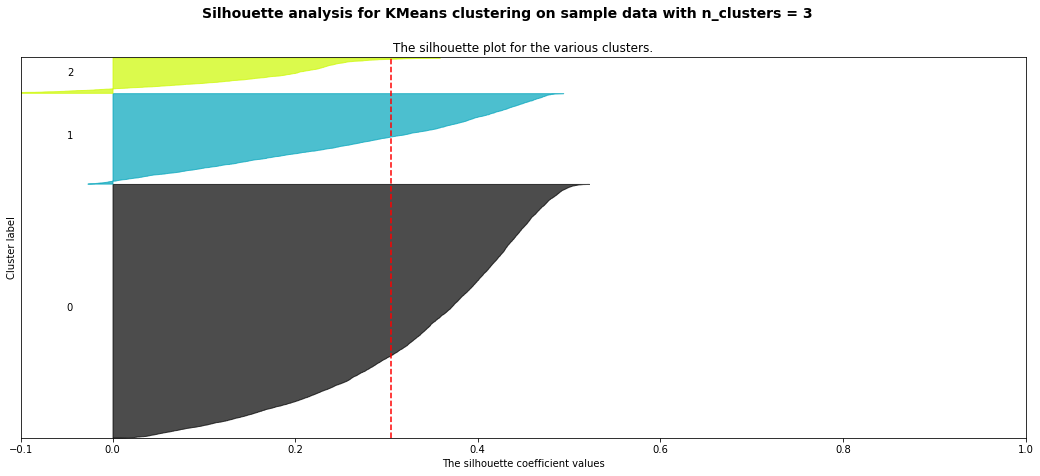

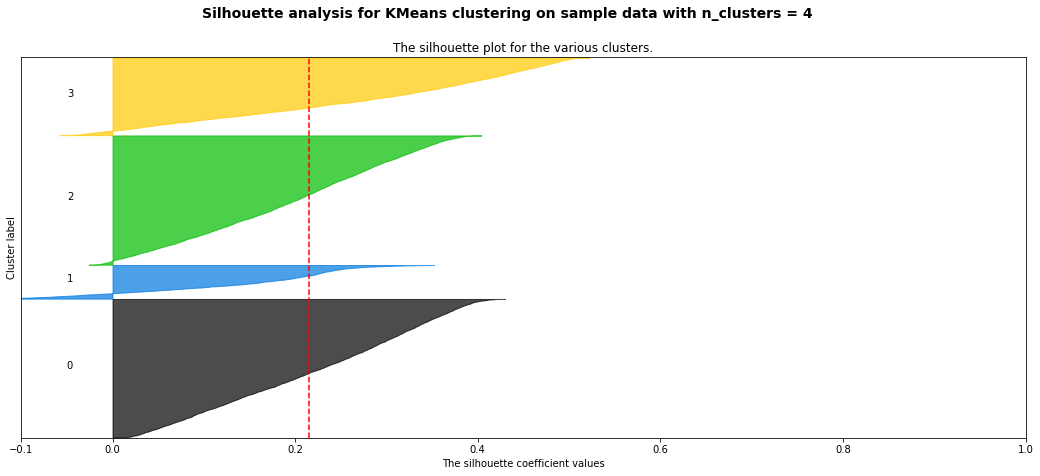

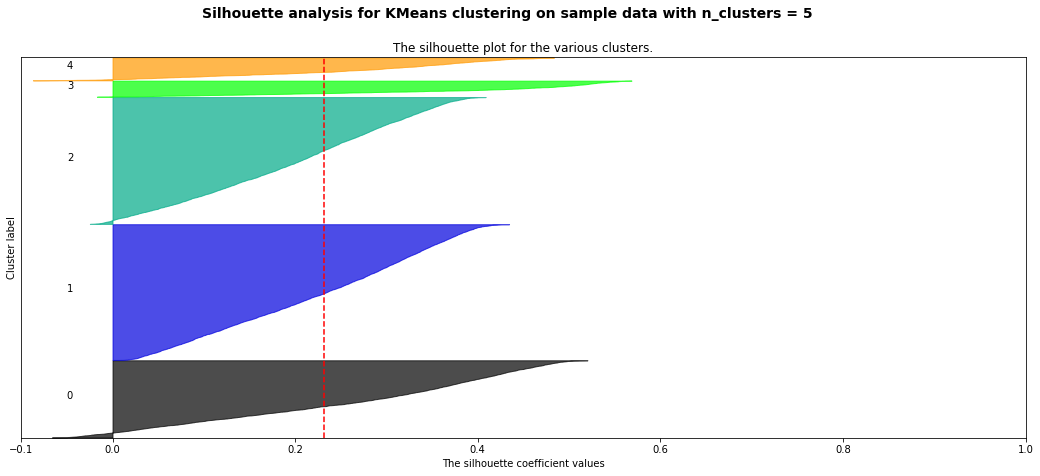

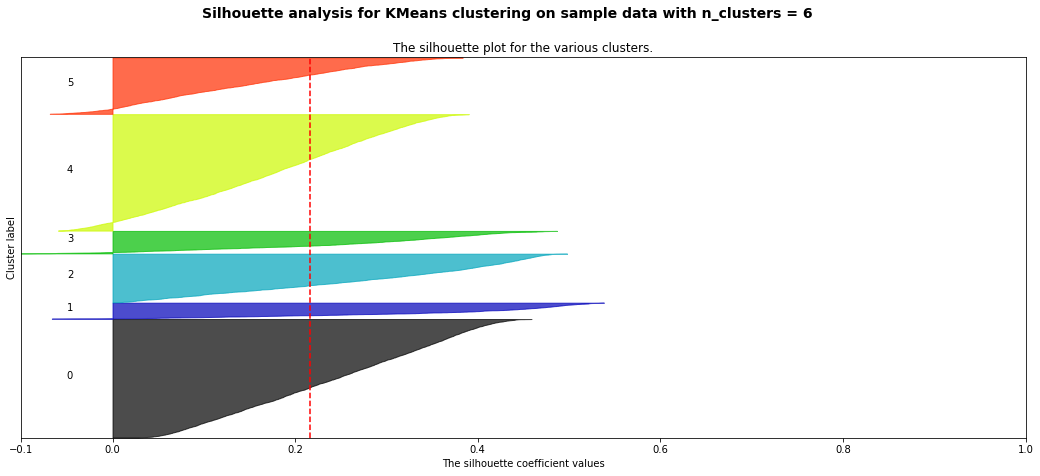

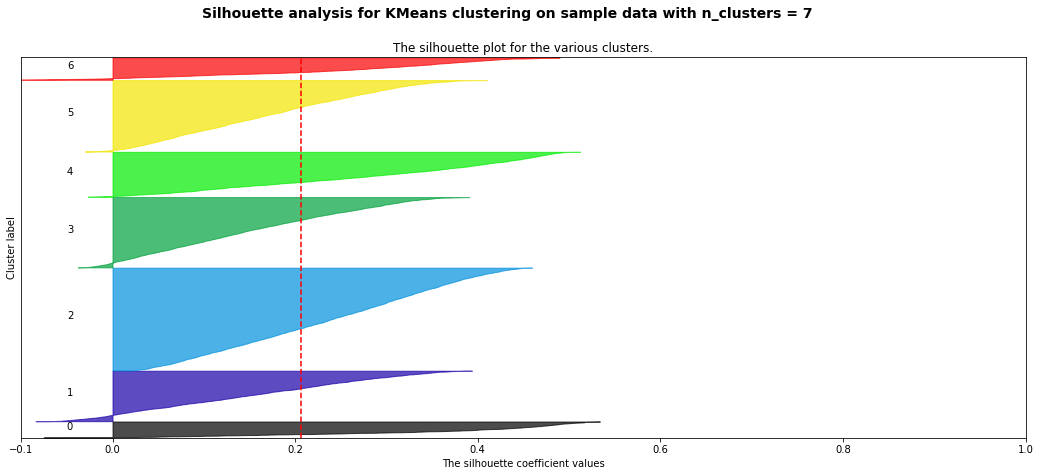

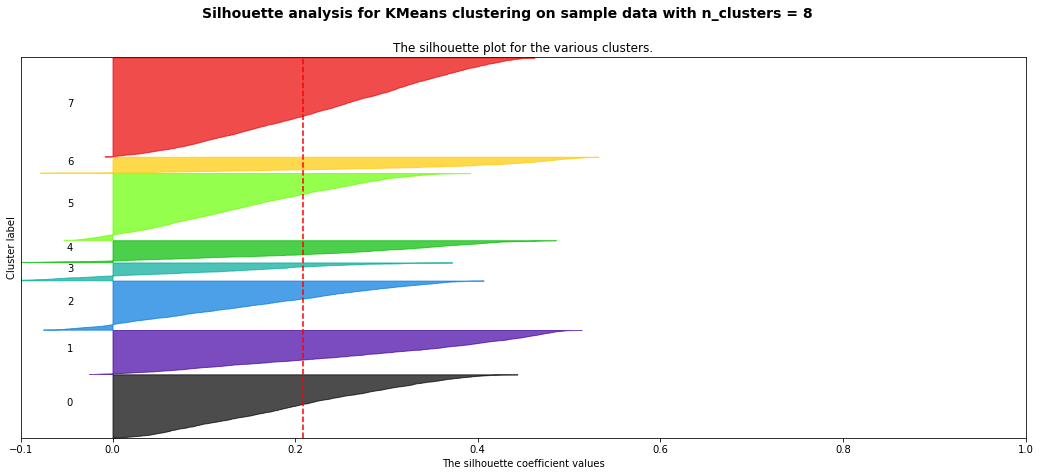

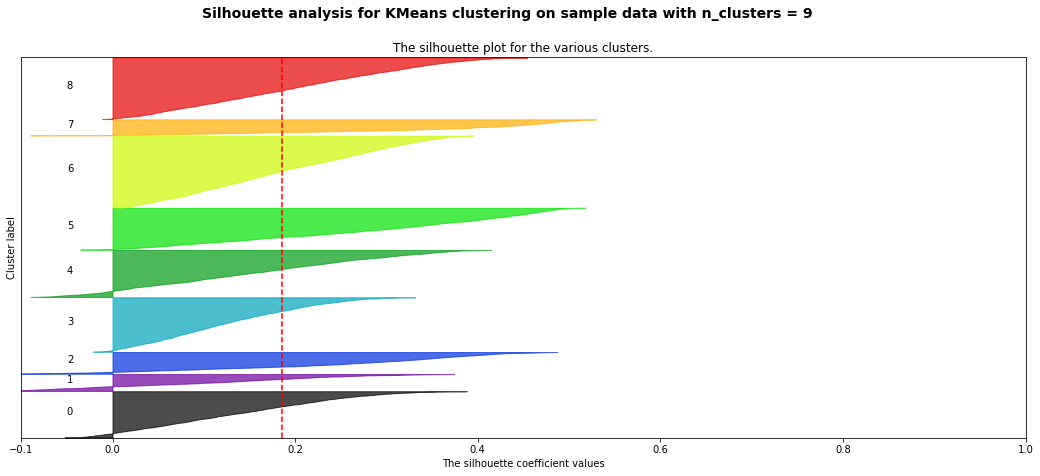

In [21]:
range_n_clusters = [3, 4, 5, 6, 7, 8, 9]
print_silhouette_analysis(X, range_n_clusters)

In [22]:
# We want to maximize silhouette_score
n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(X)

In [23]:
kmeans.labels_

array([2, 2, 4, ..., 1, 1, 1], dtype=int32)

In [24]:
kmeans.cluster_centers_

array([[0.1160902 , 0.17195294, 0.69680444, 0.73530124, 0.01329103,
        0.17791674, 0.80053495, 0.10703175, 0.50050675, 0.76262383],
       [0.11167361, 0.69935409, 0.57825956, 0.40374839, 0.02274374,
        0.16250983, 0.70268641, 0.0798117 , 0.4786466 , 0.45802131],
       [0.11836789, 0.09095837, 0.59300919, 0.71248741, 0.01789821,
        0.19878186, 0.80553034, 0.11334084, 0.51682947, 0.36356485],
       [0.09589076, 0.85689785, 0.49273172, 0.2168919 , 0.85823297,
        0.13838907, 0.51473515, 0.08203781, 0.43691672, 0.28252581],
       [0.12467338, 0.10733597, 0.6278084 , 0.69908015, 0.74223282,
        0.18530318, 0.76091602, 0.07899275, 0.52000904, 0.46629936]])

In [25]:
data_kmeans = data
data_kmeans["cluster"] = kmeans.labels_

<AxesSubplot:>

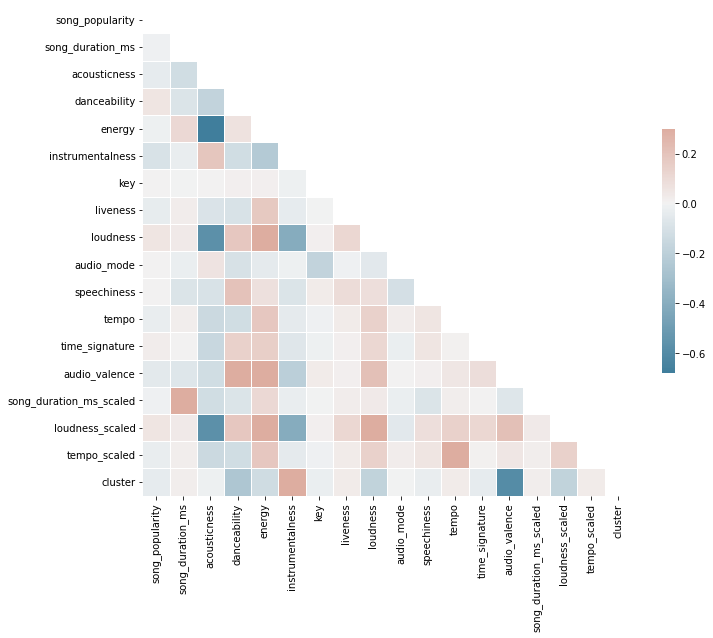

In [26]:
# Compute the correlation matrix
corr = data_kmeans.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [27]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from collections import defaultdict
from sklearn.metrics.pairwise import euclidean_distances


class PFA(object):
    def __init__(self, n_features, q=None):
        self.q = q
        self.n_features = n_features
    
    def fit(self, X):
        if not self.q:
            self.q = X.shape[1]
    
        sc = StandardScaler()
        X = sc.fit_transform(X)
    
        pca = PCA(n_components=self.q, random_state=10).fit(X) # calculation Covmatrix is embeded in PCA
        A_q = pca.components_.T
    
        kmeans = KMeans(n_clusters=self.n_features, random_state=10).fit(A_q)
        clusters = kmeans.predict(A_q)
        cluster_centers = kmeans.cluster_centers_
    
        dists = defaultdict(list)
        for i, c in enumerate(clusters):
            dist = euclidean_distances([A_q[i, :]], [cluster_centers[c, :]])[0][0]
            dists[c].append((i, dist))
    
        self.indices_ = [sorted(f, key=lambda x: x[1])[0][0] for f in dists.values()]
        self.features_ = X[:, self.indices_]
            
# Usage
pfa = PFA(n_features=3)
pfa.fit(X)
# To get the transformed matrix
features = pfa.features_
print(features)
# To get the column indices of the kept features
column_indices = pfa.indices_
print(column_indices)
print(list(X.columns)[column_indices[0]])
print(list(X.columns)[column_indices[1]])
print(list(X.columns)[column_indices[2]])

[[-0.21944889 -0.81077974 -0.67912136]
 [-0.63772033 -0.5216871  -0.48519134]
 [-0.822725    0.70381431 -0.20570396]
 ...
 [-0.97555495  0.5906911  -0.62113248]
 [-0.82674684 -0.86105672 -0.64679969]
 [ 0.21088806  0.09420592 -0.67151626]]
[9, 2, 7]
audio_valence
danceability
speechiness


In [28]:
fig = px.scatter_3d(data_kmeans, y="audio_valence", x="danceability", z="speechiness", color="cluster", hover_data=['artist_name', 'song_name'], width=800, height=800)
fig.update_traces(marker_size=10)
fig.show()

In [29]:
data_kmeans_top = data_kmeans[['artist_name', 'song_name', 'cluster', 'song_popularity']].sort_values(by=['cluster', 'song_popularity'], ascending=False)

In [30]:
data_kmeans_top[data_kmeans_top['cluster']==0].head(10)

,artist_name,song_name,cluster,song_popularity
3618,Marshmello,Happier,0,100
61,DJ Snake,"Taki Taki (with Selena Gomez, Ozuna & Cardi B)",0,98
1117,Eminem,Lucky You (feat. Joyner Lucas),0,96
86,Cardi B,I Like It,0,95
3635,Jonas Blue,Rise,0,94
6340,DJ Khaled,No Brainer,0,94
1032,George Ezra,Shotgun,0,93
3936,Calvin Harris,One Kiss (with Dua Lipa),0,93
4783,Tiësto,Jackie Chan,0,93
5488,Ozuna,Vaina Loca,0,93


In [31]:
data_kmeans_top[data_kmeans_top['cluster']==1].head(10)

,artist_name,song_name,cluster,song_popularity
3619,benny blanco,Eastside (with Halsey & Khalid),1,98
2755,Dean Lewis,Be Alright,1,96
3626,Maroon 5,Girls Like You (feat. Cardi B),1,94
5490,Nio Garcia,Te Boté - Remix,1,94
12470,XXXTENTACION,Jocelyn Flores,1,93
1107,Lil Mosey,Noticed,1,91
3625,Zedd,Happy Now,1,91
3993,Billie Eilish,lovely (with Khalid),1,90
6002,Martin Garrix,Ocean (feat. Khalid),1,90
10809,Brytiago,Asesina,1,90


In [32]:
data_kmeans_top[data_kmeans_top['cluster']==2].head(10)

,artist_name,song_name,cluster,song_popularity
1096,Kanye West,I Love It (& Lil Pump),2,99
3632,Calvin Harris,Promises (with Sam Smith),2,98
1097,Lil Peep,Falling Down,2,97
1116,Travis Scott,SICKO MODE,2,97
6287,Dynoro,In My Mind,2,97
1124,6ix9ine,FEFE (feat. Nicki Minaj & Murda Beatz),2,96
2899,XXXTENTACION,SAD!,2,96
85,6ix9ine,BEBE,2,95
2848,Imagine Dragons,Natural,2,95
2849,Tyga,Taste (feat. Offset),2,95


In [33]:
data_kmeans_top[data_kmeans_top['cluster']==3].head(10)

,artist_name,song_name,cluster,song_popularity
8364,Yiruma,River Flows In You - Original,3,76
10164,Samuel Lindon,Tallis One,3,75
12819,Petit Biscuit,Sunset Lover,3,75
10108,Józef Gatysik,Evolutionistically Yours,3,74
10139,Sigimund,The Watchtower,3,74
10173,Bela Nemeth,Talisman Stallion,3,74
10192,Ana Olgica,Sugarcane,3,74
3471,Max Richter,A Catalogue Of Afternoons,3,72
3484,Moux,Gaze,3,72
3494,Peter Sandberg,Remove The Complexities,3,72


In [34]:
data_kmeans_top[data_kmeans_top['cluster']==4].head(10)

,artist_name,song_name,cluster,song_popularity
9062,FISHER,Losing It,4,77
2,The White Stripes,Seven Nation Army,4,76
1001,The Smashing Pumpkins,1979 - Remastered 2012,4,76
9608,DJ Snake,Magenta Riddim,4,76
1696,The xx,Intro,4,75
5218,Tiësto,WOW,4,75
682,New Order,Blue Monday - 2016 Remastered Version,4,73
2007,Alice DJ,Better Off Alone,4,73
5216,Dimitri Vegas & Like Mike,Unity,4,72
11884,Brennan Savage,Look at Me Now,4,72
